# Trabajo Semanal N°1 : 'Primeras Nociones de Estimacion Espectral'
### Alumno: Magdalena Guida

### APS - 2do cuatrimestre 2025


El objetivo de este trabajo es el analisis del comportamiento de distintas señales ventaneadas a partir de sus estimadores. 
Los estimadores son funciones aplicadas sobre datosmuestrales, que sirven para reproducir el valor de un dato desconocido, para este trabajo se utilizan estimadores de amplitud: $a^i_1 = \left| X_{i_w}(\Omega_0) \right| = \left| \mathcal{F}\left\{ x(n) \cdot w_i(n) \right\} \right|$, y de frecencia $\Omega^i_1 = \arg\max_f \left\{ \left| X_{i_w}(\Omega) \right| \right\}$. Sobre ellas, se calculan 'indices' probabilisticos que pueden caracterizar la calidad del estimador.
El **sesgo**, es la diferencia entre el valor promedio del estimador y el valor 'verdadero', la **varianza** define la dispersion de los valores de la muestra.Basado sobre esto parametros, se los llama *'insesgado'* a un estimador con valor de sesgo igual a cero y *'consistente'* a un estimador cuya varianza tiende a cero con elaumento de la cantidad de muestras N. Tambien, a un estimador con varianza cercana a cero, se lo define como *'eficiente'* y *'robustos'* a los que no sufren cambios cuando se los expone tanto a valores atipicos o a desviaciones.

Las ventanas a las que se le analizara el comportamiento sobre una señal X (definida a continuacion), son: **FlatTop, BlackmanHarris** y **Hamming**. Se agrega una pequeña descripcion de cada una:

**FLATTOP**: Tiene un ensanchamiento en el lobulo principal, lo que compromete la resolucion espectral. Optimizada para estimar amplitudes con alta precision, ya que minimiza el sesgo en la magnitud espectral.

**BLACKMANHARRIS**: Ofrece excelente supresion de lobulos laterales, lo que reduce la contaminacion espectral y mejora la varianza en estimadores de frecuencia. Util en entornos ruidosos con componentes cercanos.

**HAMMING**: Opcion versatil, presenta balance entre la presicion en amplitud y la supresion de lobulos laterales. adecuada para estimaciones generales.

Se define una señal senoidal $S(n) = a_0*sen((w_0 + fr*df)*nn*2\pi)$, donde $a_0=2$ Amplitud de la senoidal.  $w_0  + fr*df = w_1$, representan a omega, formada por un $w_0=\frac{ \pi}{2}$, y un vector de frecuencias que varian con una distribucion normal:  $fr\exists [-2;2]$ multiplicado por $df=$ resolucion espectral, y vect_n, un vector de tiempos, de dimension, $[1000; 1]$  que van desde $[0;1] s$, en intervalos de $1/N = 0,001s$.  Obtengo $S$ una matriz de $[1000;200]$, por la multiplicacion entre los vectores de frecuencia con dimension: $[1; 200]$ y el de tiempos $nn$: $[1000;200]$, que lo conforma 200 repeticiones de la columna vect_n.

In [7]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.signal as sig 

#%%DEFINO PARAMETROS
SNR =3 #[dB]
R =200         #cant de realizaciones 
N = 1000       #cant de muestras ----------> esto me da dim NxR 
fs= 1000
ts = 1/fs
a0 = 2
w0 = np.pi/2 
w0 = w0 * fs / (2*np.pi)
df = fs/N
sigma_n_cuadrado = ((a0**2)/2)/(10**(SNR/10))         ## OBS!  ESTA AL CUADRADO
sigma_n = np.sqrt(sigma_n_cuadrado)
SNR_verf = 10*np.log10(a0**2 / 2) - 10*np.log10(sigma_n_cuadrado)

vect_n= np.arange(0, 1, 1/N).reshape(N, 1)   ##vector entrada a señal limpia 
nn = np.tile(vect_n, (1, R))

fr = np.random.uniform(-1/2,1/2,size = (1,R))

w1 = w0 + fr*df

#SEÑAL LIMPIA 
S = a0*np.sin(w1 * nn * 2 * np.pi) # mult matricia entre w1 y tt = S[1000,200]=[N,R]

Para continuar se declara $na$, como la definicion del ruido, una matriz de tamaño igual a S, (para poder sumarlas), como una distribucion normal que toma valores entre [0; DS_potruido=sigma_n]. Donde, sigma_n es la potencia del ruido, definida desde los valores de la potencia de la señal senoidal y del SNR definido. Esto se define asi, para poder controlar el SNR. Se hacen pruebas para SNR = 10dB y 3dB. 
Finalmente, se construye la señal $X$ como la suma entre la señal senoidal $S$ y $na$ a la cual, se la 'ventanea', con el objetico de analizar que significa cada ventana para las respuestas en el dominio frecuencial. La señal por si sola, se la concidera ventaneada con una 'Box'.
A la ventana se le da un tamaño de N, compatible con la matriz X, y se le aplica $reshape$, porque, la ventana es unidimensional por defecto, y se necesita un vector. 

In [8]:
#DEF RUIDO 
na=np.random.normal(0, sigma_n , size=(N,R))  #señal de ruido analogico
# media: 0, desvio: raiz de ruido analogico


#SEÑAL CON RUIDO = VENTANA RECT
X = S + na
# VENTANA FLATTOP
XFT = X * sig.windows.flattop(N).reshape(-1,1)
# VENATANA BLACKHARRIS
XBH = X * sig.windows.blackmanharris(N).reshape(-1,1)
# VENTANA HAMMING
XHMM = X * sig.windows.hamming(N).reshape(-1,1)

El siguiente paso, es calcular las fft de cada una de las 4 señales distintas, se declara una grilla de frecuencias desde 0Hz a 999Hz, que va de aumentando en una unidad, en este caso se da asi porque esta declarado fs=N y un filtro booleano, para solo trabajar con las frecuencias menores a la frecuencia de Nyquist.

In [9]:
# grilla de sampleo frecuencial
ff = np.linspace(0, (N-1)*df, N)   #vector de frecs desde 0 hasta fs-1 (en este caso pq N=fs) 
bfrec = ff <= fs/2    #bfrec: filtro booleano que te deja solo las frecs hasta fs/2 = frc de nyquist

#%%  Def FFTs   
X_fft = np.fft.fft(X, axis = 0) / N
XFT_fft = np.fft.fft(XFT, axis=0)/N
XBH_fft = np.fft.fft(XBH, axis=0)/N
XHMM_fft = np.fft.fft(XHMM, axis=0)/N

X_fftabs = np.abs(X_fft[:N//2, :])              # np.abs = valor absoluto de cada valor desde 0 a N/2, filas y todas las columnas, hago solo N72 pq al ser espejado la info se repite 
XFT_fftabs = np.abs(XFT_fft[:N//2, :]) 
XBH_fftabs = np.abs(XBH_fft[:N//2, :])
XHMM_fftabs = np.abs(XHMM_fft[:N//2, :])

Con el fin del analisis del impacto de las distintas ventanas utilizadas, Flat Top, Blackman Harris y Hamming, se declaran los siguientes estimadores de amplitud $a^i_1 = \left| X_{i_w}(\Omega_0) \right| = \left| \mathcal{F}\left\{ x(n) \cdot w_i(n) \right\} \right|$, y de frecencia $\Omega^i_1 = \arg\max_f \left\{ \left| X_{i_w}(\Omega) \right| \right\}$ y se calculan su *sesgo* y su *varianza* Estas medidas son las mas utilizadas para definir la calidad de los estimadores. El sesgo, es la diferencia entre el valor promedio del estimador y el valor 'verdadero' y la varianza define la dispersion de los valores de la muestra. Se le llama 'insesgado', a un estimador con sego cero y 'consistente' a un estimador cuya varianza tiende a cero con el aumento de la cantidad de muestras N. Se agregan tablas con los valores de sesgo y varianza para cada estimador de cada ventana, en los dos distintos casos de SNR trabajados.  

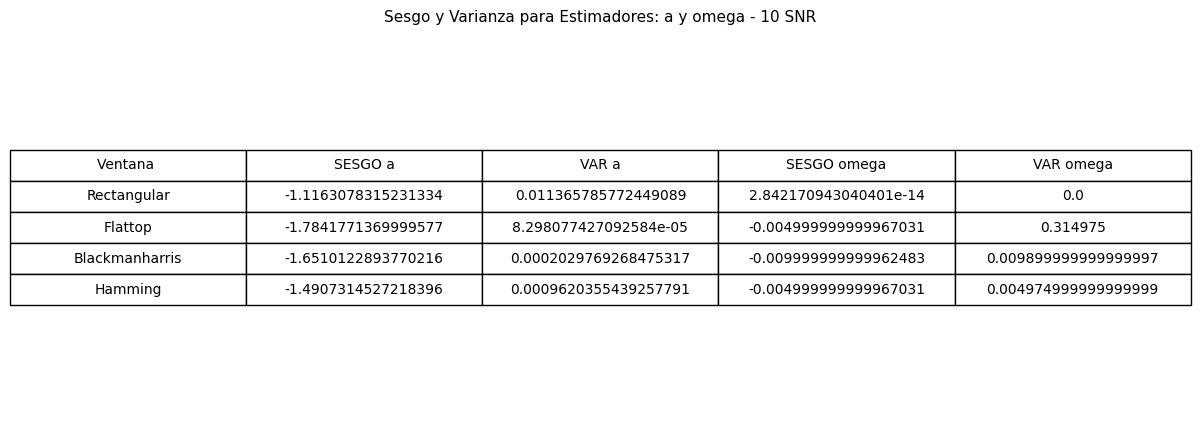

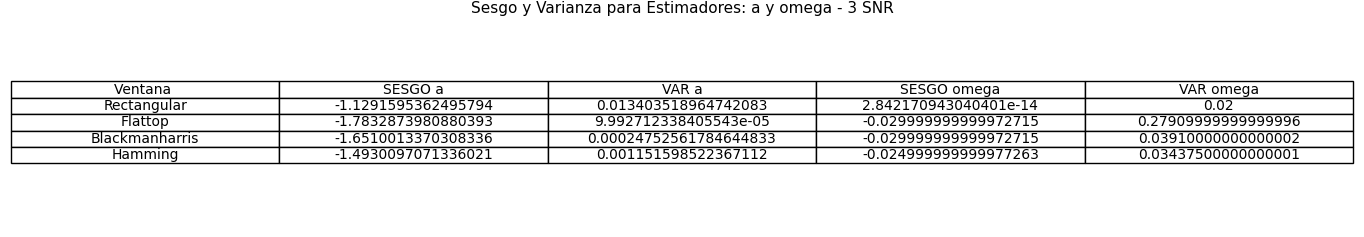

In [17]:
#%% DEFINIR ESTIMADOR DE AMPLITUD = a1

# valor verdadero = a0
a_R= np.abs(X_fft[N//4, :])
a_FT = np.abs( XFT_fft[N//4, :])
a_BH =  np.abs(XBH_fft[N//4, :])
a_HMM = np.abs(XHMM_fft[N//4, :])

# SESGO 
# Calculo el valor promedio de cada estimador 
espa_R = np.mean(a_R)
espa_FT = np.mean(a_FT)
espa_BH = np.mean(a_BH)
espa_HMM = np.mean(a_HMM)

# Sesgo:  Calculo la dif entre el valor maximo de la señal y el valor real 
sa_R = espa_R - a0
sa_FT = espa_FT - a0 
sa_BH = espa_BH - a0
sa_HMM = espa_HMM - a0

#VARIANZA 
va_R = np.var(a_R)
va_FT = np.var(a_FT)
va_BH = np.var(a_BH)
va_HMM = np.var(a_HMM)


#%% Definir estimador de Frecs = omega
w_R = np.argmax(X_fftabs, axis=0) * df  # argmax, axis=0 te tira la posicion de maximo por columna, y dsp se lo mult por la df para N/2
w_FT = np.argmax(XFT_fftabs, axis =0)* df
w_BH = np.argmax(XBH_fftabs, axis =0)* df 
w_HMM = np.argmax(XHMM_fftabs, axis=0)* df 

#SESGO 
#valor real = w0
espw_R = np.mean(w_R)   #mean = valor promedio 
espw_FT = np.mean(w_FT)
espw_BH = np.mean(w_BH)
espw_HMM = np.mean(w_HMM)

sw_R = espw_R - w0
sw_FT = espw_FT - w0
sw_BH = espw_BH - w0
sw_HMM = espw_HMM - w0

#VARIANZA
vw_R = np.var(w_R)
vw_FT = np.var(w_FT)
vw_BH = np.var(w_BH)
vw_HMM = np.var(w_HMM)

#%% GRAFICOS
# Crear tabla con los encabezados fijos
tabla = [
    ["Ventana ",     "SESGO a",      "VAR a",      "SESGO omega",      "VAR omega"],
    ["Rectangular", sa_R, va_R, sw_R, vw_R],
    ["Flattop", sa_FT,  va_FT, sw_FT, vw_FT],
    ["Blackmanharris", sa_BH,  va_BH, sw_BH, vw_BH],
    ["Hamming", sa_HMM,  va_HMM, sw_HMM, vw_HMM]
]
# Mostrar como imagen
fig, ax = plt.subplots(figsize=(12, 2 + len(tabla)*0.5))
ax.axis('tight')
ax.axis('off')
plt.title(f"Sesgo y Varianza para Estimadores: a y omega - {SNR} SNR", fontsize=11, pad=1)
table = ax.table(cellText=tabla, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.6)
plt.tight_layout()
plt.show()

from IPython.display import Image
Image("C:/Users/magui/APS/TS SEGUNDAAAA/Figure_3dB.png")


El SNR, es la relacion entre la potencia de la señal util y la potencia del ruido que la contamina, se expresa en decibelios y mide que tan clara es una señal respecto al ruido de fondo. Se calculo en la definicion de los parametros desde la ecuacion: $SNR_{dB} = 10*log_{10}(\frac{\frac{A^2}{2}}{\sigma^{2}})$.Como se indico anteriormente, se uso para declarar el RUIDO, desde un valor fijo de SNR, por lo que aparece la ecuacion de $\sigma$ en funcion de $A$ y $SNR_{dB}$. Mayor sea el parametro, mejor es la distinguision en la relacion señal-ruido. Se puede observar como para los resultados del caso de SNR=10, Fig. 1, son valores mas cercanos, aunque sea por una pequeña diferencia, al cero en modulo que los de la Fig.2 de SNR=3. La diferencia en el valor de SNR se ve plasmada en los indices de los estimadores. 

El estimador de amplitud, deberia tener buenos resultados para ventanas con lobulos principales anchos y mucha atenuacion en los lobulos laterales, esto se ve en las ventanas Flattop y Blackmanarris. Para la varianza vemos los resultados esperados, pero en el sesgo, la ventana rectangular presenta los valores mas cercanos al cero. 
El estimador de frecuencias, da resultados muy buenos para todas las ventanas excepto la Flattop, ya que esta es utlizada mayormente para la estimacion de amplitudes. Lo que se busca para una estimacion eficiente de frecuencias, son ventanas con el lobulo principal estrecho y una resolucion espectral que permitan detectar frecuencias con valores parecidos. Por las caracteristicas mencionadas, pero sin tener en cuenta la venatana rectangular, la ventana Hamming, es la que obtiene mejores resultados, como se puede ver en la tabla.


Se pueden notar resultaods favorables para la ventana 'rectangular', quenque no sean los esperados segun la teoria. Esto se da por estar dentro de una simulacion, donde la señal a analizar es diseñada para este experimento. Si se utilizara una señal desconocida, podria aparecer el problemas de que la frecuencia de la señal no coincida con uno de los bins en el que la fft divide a su dominio de frecuencias, lo que causa que la energia se distribuye en los bins cercanos, sin estar focalizada en la frecuencia verdadera. Entonces, para este caso la señal sin ventanear muestra buenos resultados, pero no es confiable para un analisis real. 


Se agrega a continuacion, los graficos de histograma para cada uno de los estimadores, los primeros 2 para un SNR=10dB y luego los de SNR=3dB, usados para mostrar la eficiencia de las ventanas.

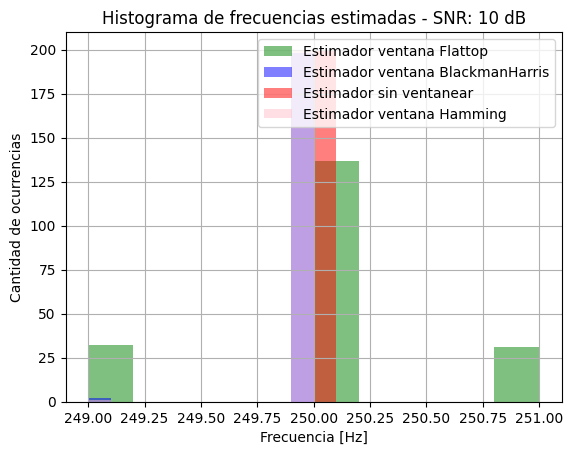

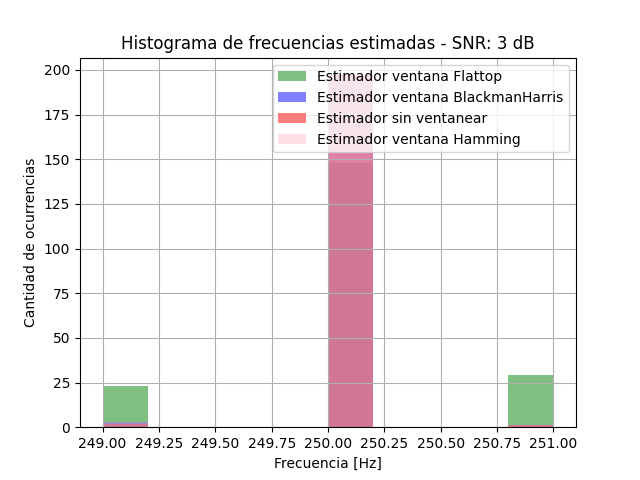

In [27]:
#%% GRAFICOS 

####Histograma omega
plt.figure()
plt.hist(w_FT, bins=10, color='green',alpha=0.5, label="Estimador ventana Flattop")
plt.hist(w_BH, bins=10, color='blue',alpha=0.5, label="Estimador ventana BlackmanHarris")
plt.hist(w_R, bins=10, color='red', alpha=0.5, label="Estimador sin ventanear")
plt.hist(w_HMM, bins=10, color='pink', alpha=0.5, label="Estimador ventana Hamming")
plt.title(f"Histograma de frecuencias estimadas - SNR: {SNR} dB")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Cantidad de ocurrencias")
plt.grid(True)
plt.legend()
plt.show()

from IPython.display import Image
Image("C:/Users/magui/APS/TS SEGUNDAAAA/Hist_frecs3dB.png")



En el primer grafico, Histograma de frecuencias estimadas para SNR=10dB, donde el valor 'verdadero' al que se busca que los estimadores se acerquen es $frec=250Hz$. Se nota, para la ventana FlatTop la peor presicion y exactitud de todas. La demas ventanas muestran sus valores concentrados y muy cercano al verdadero, con mejores resultados para el caso 'sin ventana' y un poco menos de presicion para las ventanas Hamming y BlackmanHarris. En el Histograma de frecuencias estimadas para SNR=3dB, se obtienen resultados muy parecido, solo que en general hay menor exactitud, el 'concentrado' no se encuentra justo en medio del punto de frecuencia 250Hz . 

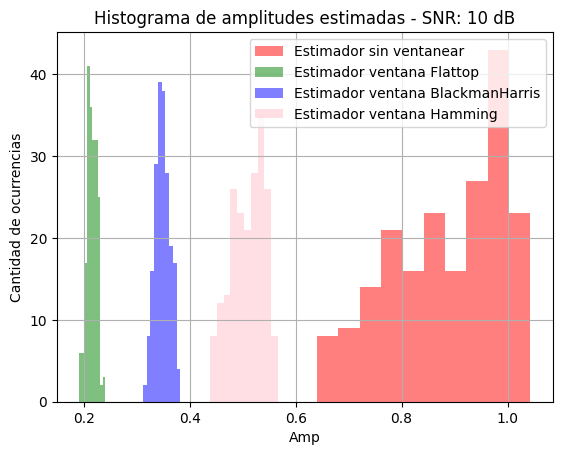

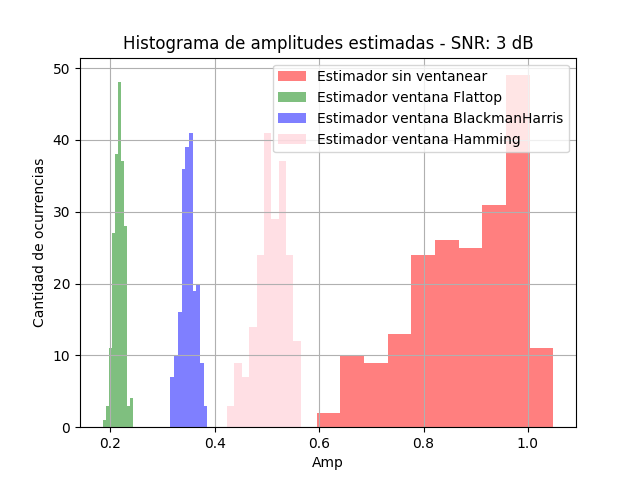

In [28]:
# Histograma a
plt.figure()
plt.hist(a_R, bins=10, color='red', alpha=0.5, label="Estimador sin ventanear") #Bins: resolucion espectral del histograma; conteo relativo. ANCHURA de los valores.
plt.hist(a_FT, bins=10, color='green', alpha=0.5, label="Estimador ventana Flattop")
plt.hist(a_BH, bins=10, color='blue', alpha=0.5, label="Estimador ventana BlackmanHarris")
plt.hist(a_HMM, bins=10, color='pink', alpha=0.5, label="Estimador ventana Hamming")
plt.title(f"Histograma de amplitudes estimadas - SNR: {SNR} dB")
plt.xlabel("Amp")
plt.ylabel("Cantidad de ocurrencias")
plt.grid(True)
plt.legend()
plt.show()

from IPython.display import Image
Image("C:/Users/magui/APS/TS SEGUNDAAAA/Hist_amps3dB.png")

El Histograma de amplitudes, busca acercarse al valor esperado para la amplitud es la mitad de la amplitud definida: $\frac{a_0}{2} =\frac{2}{2} = 1$. Se observa como desde la ventana FlatTop a la izquierda(verde), la Blackman Harris(azul), la Hamming(rosa) y la señal sin ventanear (roja), exite un aumento progresivo de la exactitud al costo de perder presicion. Lo que se ve como, menos capacidad de repeticion del resultado, ocupa un rango mas ancho, pero se encuentra posicionado mas cerca al valor esperado = 1. Mientras que la ventana Flattop, tine menos rango, pero posicionada mas lejos del valor esperado. La diferencia generada por el cambio de SNR, es minimo, pero hay mejor exactitud en general. 

En conclusion, acerca del SNR se puede asegurar que su aumento mejora la precision y exactitud de los estimadores, como se observa en los histogramas. En amplitud, hay un compromiso entre exactitud y precision segun la ventana utilizada. En frecuencia, los resultados son más estables y cercanos al valor verdadero cuando se emplean ventanas con buena resolucion espectral. Acerca del empleo de ventanas, los resultados muestran que la ventana FlatTop es la mas eficiente para estimar amplitud, con baja varianza pero alto sesgo. En cambio, para estimar frecuencia, Hamming y BlackmanHarris ofrecen mejor resolución y menor dispersion, especialmente en condiciones de alto SNR. La señal sin ventanear mostro buen rendimiento en simulacion, pero no es confiable en escenarios reales por su sensibilidad a la alineacion espectral.